<a href="https://colab.research.google.com/github/Sharath198118/White-Blood-Cancer/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt


Categories=['ALL',"MM"]
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/Data/' 

#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    
    for img in os.listdir(path):
        
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
        
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data



loading... category : ALL
loaded category:ALL successfully
loading... category : MM
loaded category:MM successfully


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, val_index in rkf.split(scaled_data):
     print("Train:", train_index, "Validation:", val_index)
     x_train, x_test = scaled_data[train_index], scaled_data[val_index]
     y_train, y_test = y[train_index], y[val_index]

Train: [  0   1   2   3   4   5   6   7   8   9  11  13  14  15  16  17  18  19
  21  22  23  25  26  27  28  29  30  32  34  35  36  37  38  40  42  44
  45  46  48  49  50  51  53  55  58  59  60  61  62  63  64  65  66  68
  69  70  71  75  76  77  78  79  80  82  83  84  85  87  88  89  91  92
  93  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 115 117 118 119 120 121 122 123 125 126 127 128 130 131 132 133 136
 137 138 139 140 141 142 144 145 148 149 150 151 152 153 154 155 156 157
 158 159 161 162 163 164 165 167 168 170 171 174 175 176 177 178 179 180
 181 183 184 185 186 187 189 190 191 192 193 194 196 197 199 200 201 205
 206 207 208 209 210 211 212 213 215 216 217 218 219 220 221 222 224 225
 226 227 228 229 231 232 233 234 235 236 237 238 239 240 241 242 244 245
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 266
 268 270 271 272 273 274 276 277 278 280 281 282 283 284 285 286 287 288
 289 290 291 293 294 295 296 297 299 301 302

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)


In [ ]:
model.fit(x_train,y_train)
print("The Model is trained well with the given images")
model.best_params_

The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The model is 86.25% accurate


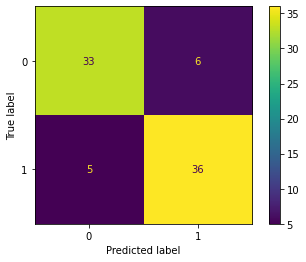

SVM accuracy     :    86.25%
SVM precision    :   85.71428571428571%
SVM recall       :   87.8048780487805%
SVM f1 score     :   86.74698795180721%


In [8]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay
import math
cm=confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accsvm=accuracy_score(y_pred,y_test)
presvm=precision_score(y_pred,y_test)
rcsvm=recall_score(y_pred,y_test)
f1svm=f1_score(y_pred,y_test)
svm_metric={'Accuracy':accsvm,'precision':presvm,'Recall':rcsvm,'F1':f1svm}
print(f"SVM accuracy     :    {accuracy_score(y_pred,y_test)*100}%")  
print(f"SVM precision    :   {precision_score(y_pred,y_test)*100}%")
print(f"SVM recall       :   {recall_score(y_pred,y_test)*100}%")
print(f"SVM f1 score     :   {f1_score(y_pred,y_test)*100}%")


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_rf=RF.predict(x_test)
print("The predicted Data is :")
print(y_pred_rf)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred_rf,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The model is 100.0% accurate


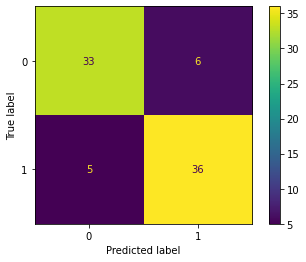

Random Forest accuracy    :     100.0%
Random Forest precision   :     100.0%
Random Forest recall      :     100.0%
Random Forest f1 score    :     100.0%


In [10]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

accrf=accuracy_score(y_pred_rf,y_test)
prerf=precision_score(y_pred_rf,y_test)
rcrf=recall_score(y_pred_rf,y_test)
f1rf=f1_score(y_pred_rf,y_test)

rf_metric={'Accuracy':accrf,'precision':prerf,'Recall':rcrf,'F1':f1rf}
print(f"Random Forest accuracy    :     {accuracy_score(y_pred_rf,y_test)*100}%")
print(f"Random Forest precision   :     {precision_score(y_pred_rf,y_test)*100}%")
print(f"Random Forest recall      :     {recall_score(y_pred_rf,y_test)*100}%")
print(f"Random Forest f1 score    :     {f1_score(y_pred_rf,y_test)*100}%")

In [11]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print("The predicted Data is :")
print(y_pred_nb)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred_nb,y_test)*100}% accurate")

The predicted Data is :
[1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The model is 61.25000000000001% accurate


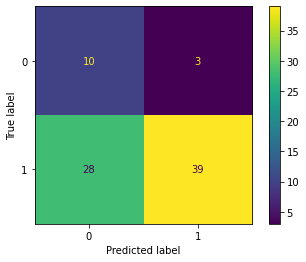

Naive Bayes accuracy    :     61.25000000000001%
Naive Bayes precision   :     92.85714285714286%
Naive Bayes recall      :     58.2089552238806%
Naive Bayes f1 score    :     71.55963302752293%


In [13]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_pred_nb,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accnb=accuracy_score(y_pred_nb,y_test)
prenb=precision_score(y_pred_nb,y_test)
rcnb=recall_score(y_pred_nb,y_test)
f1nb=f1_score(y_pred_nb,y_test)
nb_metric={'Accuracy':accnb,'precision':prenb,'Recall':rcnb,'F1':f1nb}
print(f"Naive Bayes accuracy    :     {accuracy_score(y_pred_nb,y_test)*100}%")
print(f"Naive Bayes precision   :     {precision_score(y_pred_nb,y_test)*100}%")
print(f"Naive Bayes recall      :     {recall_score(y_pred_nb,y_test)*100}%")
print(f"Naive Bayes f1 score    :     {f1_score(y_pred_nb,y_test)*100}%")

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
print("The predicted Data is :")
print(y_pred_dtc)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred_dtc,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The model is 98.75% accurate


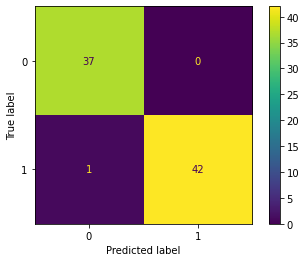

Decision Tree accuracy    :     98.75%
Decision Tree precision   :     100.0%
Decision Tree recall      :     97.67441860465115%
Decision Tree f1 score    :     98.8235294117647%


In [15]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_pred_dtc,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accdt=accuracy_score(y_pred_dtc,y_test)
predt=precision_score(y_pred_dtc,y_test)
rcdt=recall_score(y_pred_dtc,y_test)
f1dt=f1_score(y_pred_dtc,y_test)
dt_metric={'Accuracy':accdt,'precision':predt,'Recall':rcdt,'F1':f1dt}
print(f"Decision Tree accuracy    :     {accuracy_score(y_pred_dtc,y_test)*100}%")
print(f"Decision Tree precision   :     {precision_score(y_pred_dtc,y_test)*100}%")
print(f"Decision Tree recall      :     {recall_score(y_pred_dtc,y_test)*100}%")
print(f"Decision Tree f1 score    :     {f1_score(y_pred_dtc,y_test)*100}%")

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print("The predicted Data is :")
print(y_pred_knn)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred_knn,y_test)*100}% accurate")

The predicted Data is :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
The model is 68.75% accurate


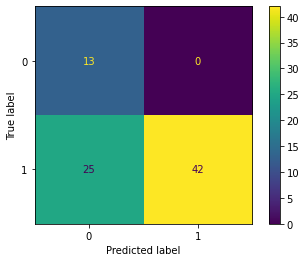

KNN accuracy    :     68.75%
KNN precision   :     100.0%
KNN recall      :     62.68656716417911%
KNN f1 score    :     77.06422018348624%


In [17]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_pred_knn,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
accknn=accuracy_score(y_pred_knn,y_test)
preknn=precision_score(y_pred_knn,y_test)
rcknn=recall_score(y_pred_knn,y_test)
f1knn=f1_score(y_pred_knn,y_test)
knn_metric={'Accuracy':accknn,'precision':preknn,'Recall':rcknn,'F1':f1knn}
print(f"KNN accuracy    :     {accuracy_score(y_pred_knn,y_test)*100}%")
print(f"KNN precision   :     {precision_score(y_pred_knn,y_test)*100}%")
print(f"KNN recall      :     {recall_score(y_pred_knn,y_test)*100}%")
print(f"KNN f1 score    :     {f1_score(y_pred_knn,y_test)*100}%")

Text(0, 0.5, 'Accuracy')

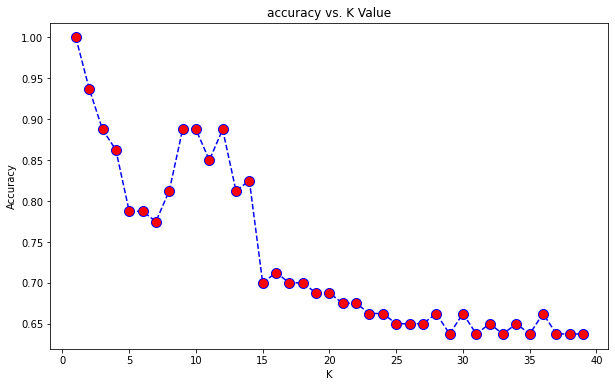

In [18]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score( yhat,y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

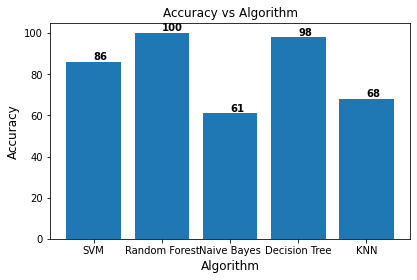

In [19]:
import math
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,3))
ax=fig.add_axes([0,0,1,1])
algos=["SVM","Random Forest","Naive Bayes","Decision Tree","KNN"]
scores=[math.floor(accsvm*100),math.floor(accrf*100),math.floor(accnb*100),math.floor(accdt*100),math.floor(accknn*100)]
ax.bar(algos,scores)
ax.set_ylabel('Accuracy',fontsize=12)
ax.set_xlabel('Algorithm',fontsize=12)
ax.set_title('Accuracy vs Algorithm')

for i,v in enumerate(scores):
    ax.text(i,v+1,str(v),color="black",fontweight="bold")


plt.show()

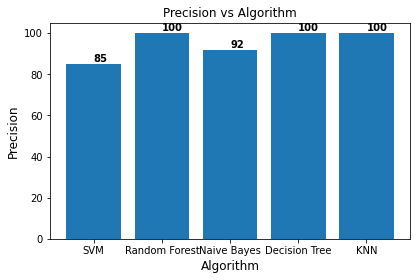

In [20]:
import math
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,3))
ax=fig.add_axes([0,0,1,1])
algos=["SVM","Random Forest","Naive Bayes","Decision Tree","KNN"]
scores=[math.floor(presvm*100),math.floor(prerf*100),math.floor(prenb*100),math.floor(predt*100),math.floor(preknn*100)]
ax.bar(algos,scores)
ax.set_ylabel('Precision',fontsize=12)
ax.set_xlabel('Algorithm',fontsize=12)
ax.set_title('Precision vs Algorithm')

for i,v in enumerate(scores):
    ax.text(i,v+1,str(v),color="black",fontweight="bold")


plt.show()

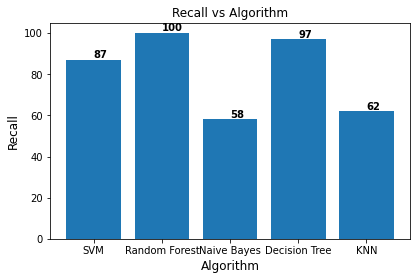

In [21]:
import math
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,3))
ax=fig.add_axes([0,0,1,1])
algos=["SVM","Random Forest","Naive Bayes","Decision Tree","KNN"]
scores=[math.floor(rcsvm*100),math.floor(rcrf*100),math.floor(rcnb*100),math.floor(rcdt*100),math.floor(rcknn*100)]
ax.bar(algos,scores)
ax.set_ylabel('Recall',fontsize=12)
ax.set_xlabel('Algorithm',fontsize=12)
ax.set_title('Recall vs Algorithm')

for i,v in enumerate(scores):
    ax.text(i,v+1,str(v),color="black",fontweight="bold")


plt.show()

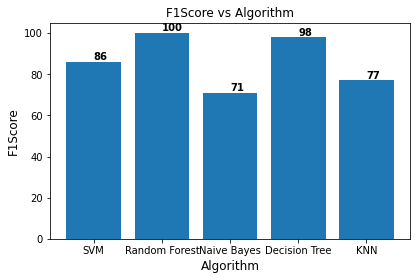

In [22]:
import math
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,3))
ax=fig.add_axes([0,0,1,1])
algos=["SVM","Random Forest","Naive Bayes","Decision Tree","KNN"]
scores=[math.floor(f1svm*100),math.floor(f1rf*100),math.floor(f1nb*100),math.floor(f1dt*100),math.floor(f1knn*100)]
ax.bar(algos,scores)
ax.set_ylabel('F1Score',fontsize=12)
ax.set_xlabel('Algorithm',fontsize=12)
ax.set_title('F1Score vs Algorithm')

for i,v in enumerate(scores):
    ax.text(i,v+1,str(v),color="black",fontweight="bold")

#plt.savefig('barplot-1.png',dpi=200,format='png',bbox_inches='tigh t')
plt.show()

In [23]:
Metrics=pd.DataFrame({
    'SVM':svm_metric,
    'RF':rf_metric,
    'NB':nb_metric,
    'DT':dt_metric,
    'KNN':knn_metric
})

In [24]:
Metrics.head()

,SVM,RF,NB,DT,KNN
Accuracy,0.862500,1.0,0.612500,0.987500,0.687500
precision,0.857143,1.0,0.928571,1.000000,1.000000
Recall,0.878049,1.0,0.582090,0.976744,0.626866
F1,0.867470,1.0,0.715596,0.988235,0.770642


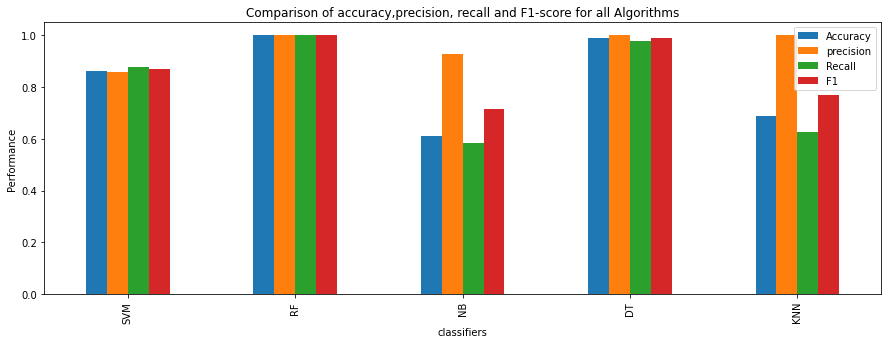

In [25]:
Metrics.transpose().plot.bar(xlabel='classifiers',ylabel='Performance',
                             y=['Accuracy','precision','Recall','F1'],
                             figsize=(15,5),
                             title='Comparison of accuracy,precision, recall and F1-score for all Algorithms')
